In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics 

In [4]:
data = pd.read_csv("Phishing_Legitimate_full.csv", header=0, sep=',')

In [5]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [6]:
data.shape

(10000, 50)

In [7]:
data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [8]:
#split data into x(features) and y(label)
col = ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT']
X = data[col].values
Y = data['CLASS_LABEL'].values

In [9]:
print(X.shape)
print(Y.shape)

(10000, 48)
(10000,)


In [10]:
#to check if theres any nulll values in the dataset
from pandas.core.api import isnull
data.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


#data normalization 


In [11]:
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
abs_scaler.fit(data)
abs_scaler.max_abs_
scaled_data = abs_scaler.transform(data)
df_scaled = pd.DataFrame(scaled_data, columns=data.columns)
df_scaled.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,0.0001,0.142857,0.071429,0.277778,0.284585,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,1.0
1,0.0002,0.142857,0.071429,0.166667,0.569170,0.000000,0.000000,0.0,0.0,0.111111,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
2,0.0003,0.142857,0.071429,0.111111,0.229249,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0,0.0,1.0
3,0.0004,0.142857,0.071429,0.333333,0.312253,0.018182,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
4,0.0005,0.142857,0.000000,0.222222,0.181818,0.000000,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,1.0
5,0.0006,0.142857,0.071429,0.055556,0.166008,0.018182,0.000000,0.0,0.0,0.000000,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
6,0.0007,0.095238,0.000000,0.277778,0.237154,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-1.0,-1.0,1.0
7,0.0008,0.047619,0.000000,0.166667,0.118577,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,0.0009,0.380952,0.500000,0.111111,0.300395,0.018182,0.111111,0.0,0.0,0.000000,...,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
9,0.0010,0.095238,0.000000,0.111111,0.181818,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0


In [13]:
X = df_scaled[col].values
Y = data['CLASS_LABEL'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [14]:
print(x_train.shape)
print(x_test.shape)

(7000, 48)
(3000, 48)


#KNN Model 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.954


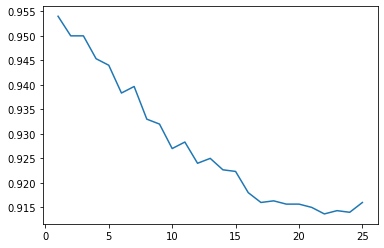

In [17]:
import matplotlib.pyplot as plt
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [18]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [19]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [21]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores)

[0.939 0.934 0.936 0.948 0.92  0.953 0.929 0.925 0.921 0.935]


In [22]:
print(scores.mean())

0.9339999999999999


[0.9422999999999998, 0.9391, 0.9376, 0.9353999999999999, 0.9339999999999999, 0.9333, 0.9299, 0.9313999999999998, 0.9311, 0.9297000000000001, 0.9277000000000001, 0.9246999999999999, 0.9239, 0.9244, 0.924, 0.922, 0.9205, 0.9189, 0.9179999999999999, 0.9168, 0.9167, 0.9169, 0.9166999999999998, 0.9163, 0.9151, 0.9145000000000001, 0.9138, 0.9119000000000002, 0.9115, 0.9094999999999999]


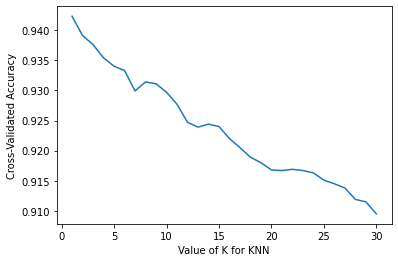

In [23]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
print(cross_val_score(knn, X, Y, cv=10, scoring='accuracy').mean())

0.9422999999999998


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [39]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [41]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [42]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.9423 0.9391 0.9376 0.9354 0.934  0.9333 0.9299 0.9314 0.9311 0.9297
 0.9277 0.9247 0.9239 0.9244 0.924  0.922  0.9205 0.9189 0.918  0.9168
 0.9167 0.9169 0.9167 0.9163 0.9151 0.9145 0.9138 0.9119 0.9115 0.9095]


Text(0, 0.5, 'Cross-Validated Accuracy')

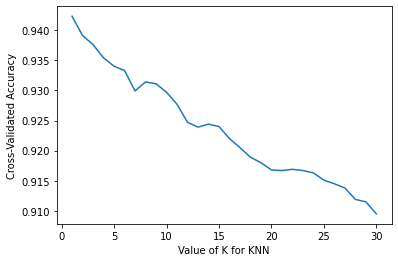

In [43]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [44]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9422999999999998
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [45]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [47]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [48]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.9423,0.014602,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.9423,0.014602,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.9391,0.014307,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.9423,0.014602,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.9376,0.012831,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.9386,0.013162,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.9354,0.010210,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.9409,0.013967,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.9340,0.010286,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.9383,0.010583,"{'n_neighbors': 5, 'weights': 'distance'}"


In [49]:
print(grid.best_score_)
print(grid.best_params_)

0.9422999999999998
{'n_neighbors': 1, 'weights': 'uniform'}
